In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import GridSearchCV
import warnings
from sklearn.metrics import accuracy_score

In [2]:
df = pd.read_csv("iris.csv")

In [3]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [5]:
X = df.drop('species', axis=1)
y = df['species']

In [6]:
X

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [7]:
y

0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
         ...    
145    virginica
146    virginica
147    virginica
148    virginica
149    virginica
Name: species, Length: 150, dtype: object

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [9]:
treeclassifier = DecisionTreeClassifier()

In [10]:
treeclassifier.fit(X_train, y_train)

DecisionTreeClassifier()

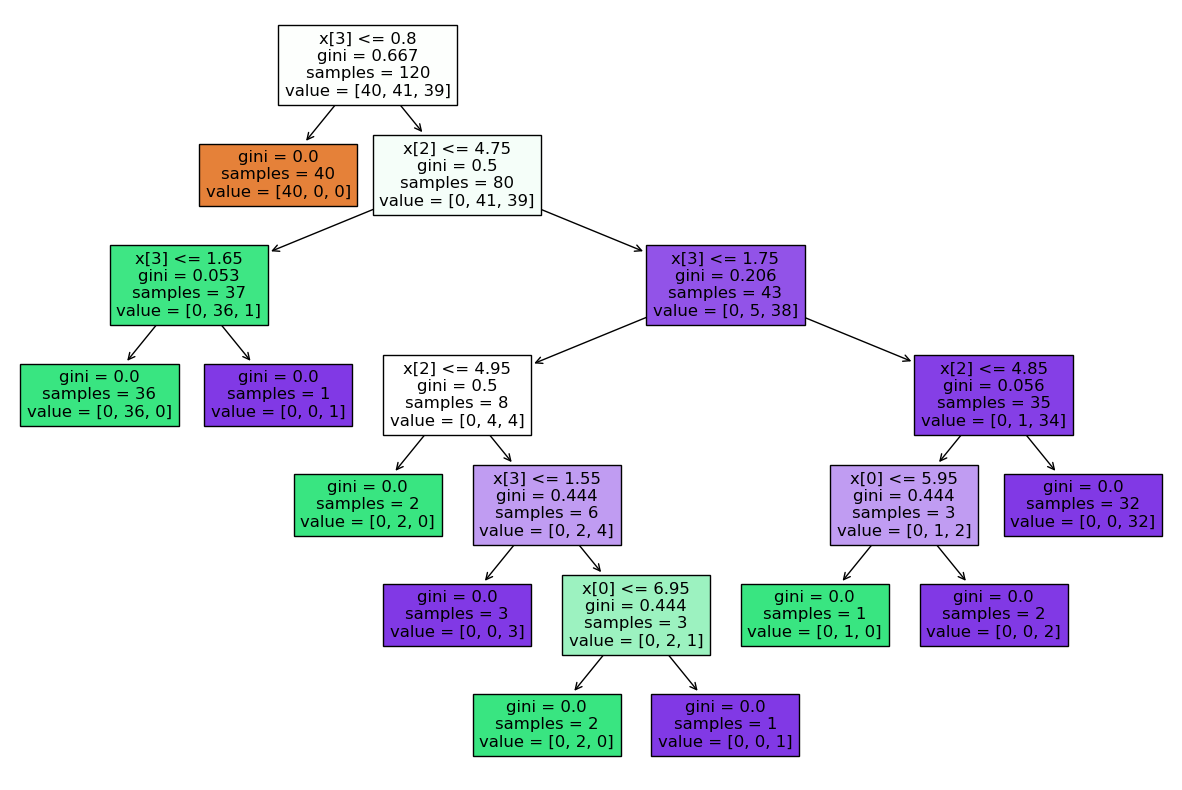

In [11]:
plt.figure(figsize=(15,10))
tree.plot_tree(treeclassifier, filled=True)
plt.show()

In [12]:
y_pred = treeclassifier.predict(X_test)

In [13]:
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(classification_report(y_test,y_pred))

[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



### Decision Tree Prepruning and Hyperparameter Tuning

In [14]:
param={
    'criterion':['gini','entropy', 'log_loss'],
    'splitter':['best','random'],
    'max_depth':[1,2,3,4,5],
    'max_features':['auto','sqrt','log2']
}

In [15]:
param

{'criterion': ['gini', 'entropy', 'log_loss'],
 'splitter': ['best', 'random'],
 'max_depth': [1, 2, 3, 4, 5],
 'max_features': ['auto', 'sqrt', 'log2']}

In [16]:
treemodel=DecisionTreeClassifier()

In [17]:
grid=GridSearchCV(treeclassifier,param_grid=param,cv=5,scoring='accuracy')

In [18]:
import warnings
warnings.filterwarnings('ignore')
grid.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [1, 2, 3, 4, 5],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [19]:
grid.best_params_

{'criterion': 'log_loss',
 'max_depth': 4,
 'max_features': 'log2',
 'splitter': 'best'}

In [20]:
grid.best_score_

0.95

In [21]:
y_pred=grid.predict(X_test)

In [22]:
y_pred

array(['versicolor', 'setosa', 'virginica', 'versicolor', 'versicolor',
       'setosa', 'versicolor', 'virginica', 'versicolor', 'versicolor',
       'virginica', 'setosa', 'setosa', 'setosa', 'setosa', 'versicolor',
       'virginica', 'versicolor', 'versicolor', 'virginica', 'setosa',
       'virginica', 'setosa', 'virginica', 'virginica', 'virginica',
       'virginica', 'virginica', 'setosa', 'setosa'], dtype=object)

In [23]:
cm=confusion_matrix(y_test,y_pred)
print(cm)
print(classification_report(y_test,y_pred))

[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [24]:
score=accuracy_score(y_test,y_pred)

In [25]:
score

1.0